<a href="https://colab.research.google.com/github/kaderdjb/Web-Net-Detection-tool-based-IA/blob/main/PFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Setting up the data from kaggel** 

In [ ]:
 #Install kaggel
 ! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aekdjabri","key":"3f2f7ccee2c4d07f07a70ff13a44a4e3"}'}

In [ ]:
#Create kaggel folder
! mkdir ~/.kaggle

In [ ]:
#copy kaggel.json to folder created 
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                     Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           7368        228  1.0              
devansodariya/student-performance-data                       Student Performance Dataset                           7KB  2022-05-26 13:55:09           3197        127  0.9705882        
iamsouravbanerjee/software-professional-salaries-2022        Salary Dataset - 2022                               526KB  2022-06-10 06:02:59           1175         35  1.0              
paradisejoy/top-hits-spotify-from-20002019                   Top Hits Spoti

In [ ]:
#Download Data
! kaggle datasets download -d solarmainframe/ids-intrusion-csv

100% 1.59G/1.60G [00:26<00:00, 98.3MB/s]
100% 1.60G/1.60G [00:26<00:00, 65.6MB/s]


In [ ]:
#unzip the file
! mkdir ids-intrusion-csv 
! unzip ids-intrusion-csv.zip -d ids-intrusion-csv

Archive:  ids-intrusion-csv.zip
  inflating: ids-intrusion-csv/02-14-2018.csv  
  inflating: ids-intrusion-csv/02-15-2018.csv  
  inflating: ids-intrusion-csv/02-16-2018.csv  
  inflating: ids-intrusion-csv/02-20-2018.csv  
  inflating: ids-intrusion-csv/02-21-2018.csv  
  inflating: ids-intrusion-csv/02-22-2018.csv  
  inflating: ids-intrusion-csv/02-23-2018.csv  
  inflating: ids-intrusion-csv/02-28-2018.csv  
  inflating: ids-intrusion-csv/03-01-2018.csv  
  inflating: ids-intrusion-csv/03-02-2018.csv  


#  Loading the csv

In [ ]:
import pandas as pd # panda is liberary for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

data_frame1 = pd.read_csv('/content/ids-intrusion-csv/02-14-2018.csv')
data_frame2 = pd.read_csv('/content/ids-intrusion-csv/02-15-2018.csv')
data_frame3 = pd.read_csv('/content/ids-intrusion-csv/02-16-2018.csv')
data_frame4 = pd.read_csv('/content/ids-intrusion-csv/02-21-2018.csv')
data_frame5 = pd.read_csv('/content/ids-intrusion-csv/02-22-2018.csv')
data_frame6 = pd.read_csv('/content/ids-intrusion-csv/02-23-2018.csv')
data_frame7 = pd.read_csv('/content/ids-intrusion-csv/03-01-2018.csv')
data_frame8 = pd.read_csv('/content/ids-intrusion-csv/03-02-2018.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
import numpy as np
import pandas as pd

#Correcting "the label error"
data_frame3.drop(data_frame3.index[(data_frame3["Label"] == "Label")],axis=0,inplace=True) #So i can delete rows where label = label is not nedded 
data_frame7.drop(data_frame7.index[(data_frame7["Label"] == "Label")],axis=0,inplace=True)


Appling sampling and stratified sampling on the **datasets**

In [ ]:
import numpy as np
import pandas as pd

# Applying Stratified Sampling on the dataset after regrouping the same labels
Instance=10000 #Number of instance 
Stratified_data_frame1=data_frame1.groupby('Label', group_keys=False).apply(lambda x: x.sample(Instance)) # Applying Stratified Sampling on the datasets
Stratified_data_frame2=data_frame2.groupby('Label', group_keys=False).apply(lambda x: x.sample(Instance))
Stratified_data_frame3=data_frame3.groupby('Label', group_keys=False).apply(lambda x: x.sample(Instance))
del data_frame1,data_frame2,data_frame3

#web attcks in these dataframes are less than 10000 hence we are randomly sampling the points here 

Stratified_data_frame4=data_frame4.head(Instance)
Stratified_data_frame5=data_frame5.head(Instance)
Stratified_data_frame6=data_frame6.head(Instance)
del data_frame4,data_frame5,data_frame6

Stratified_data_frame7=data_frame7.groupby('Label', group_keys=False).apply(lambda x: x.sample(Instance)) # Applying Stratified Sampling on the datasets
Stratified_data_frame8=data_frame8.groupby('Label', group_keys=False).apply(lambda x: x.sample(Instance))

del data_frame8,data_frame7

Concatenating the stratified samples we form our final dataset which hold the benign and web attack forming our final dataset

In [ ]:
import numpy as np
import pandas as pd
final_dataset = [
    Stratified_data_frame1, 
    Stratified_data_frame2,
    Stratified_data_frame3,
    Stratified_data_frame4, 
    Stratified_data_frame5,
    Stratified_data_frame6,
    Stratified_data_frame7,
    Stratified_data_frame8,    
]
final_dataset=pd.concat(final_dataset) #concatenate the Stratified samples
del Stratified_data_frame1,Stratified_data_frame2,Stratified_data_frame3,Stratified_data_frame4,Stratified_data_frame5,Stratified_data_frame6,Stratified_data_frame7,Stratified_data_frame8

we do not have enough amount individual web attack so can specify which type of attack it is. Therefore,we are making this problem from a multi class classification problem to a Binary Classification problem. Encoding all types of web attacks to be 0 and the Benign requests to be 1.

In [ ]:
import numpy as np
import pandas as pd

#Encoding all types of web attacks by the label web-attack
final_dataset.replace(to_replace=['Brute Force -Web','Brute Force -XSS','SQL Injection'],value='Web-attack',inplace=True)
#Class Labels and its corresponding counts
final_dataset['Label'].value_counts()

Benign                      71272
FTP-BruteForce              10000
SSH-Bruteforce              10000
DoS attacks-GoldenEye       10000
DoS attacks-Slowloris       10000
DoS attacks-Hulk            10000
DoS attacks-SlowHTTPTest    10000
Infilteration               10000
Bot                         10000
DDOS attack-HOIC             6070
DDOS attack-LOIC-UDP         1730
Web-attack                    928
Name: Label, dtype: int64

#  **Data Cleaning** 

In [ ]:
import numpy as np
import pandas as pd

#Converting the feature datatypes
final_dataset['Timestamp'] = pd.to_datetime(final_dataset['Timestamp']).astype(np.int64)#converting the time stamps to int

columns=final_dataset.columns


for i in columns: #changing all the numerical features to float datatype
    if i != 'Label':
      final_dataset[i]=final_dataset[i].astype(float)
    
final_dataset =  final_dataset.drop_duplicates(keep="first")# Dropping the duplicates

final_dataset=final_dataset.replace([np.inf, -np.inf], np.nan) #Replacing the infinite values to NaN

final_dataset.replace(r'^\s*$', np.nan, regex=True)#converting the blank spaces into NaN values

final_dataset=final_dataset.replace(np.nan, 0) #Converting the NaN values to zeros

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """


# Feature selection

In [ ]:
import numpy as np
import pandas as pd

#putting names of the features in array
columns = final_dataset.columns
#dropping the constant features
for feature in columns: 
  if (final_dataset[feature] == 0).all():
      final_dataset.drop(feature,axis='columns',inplace=True)    


In [ ]:
#install library eli5 from github
! pip install git+https://github.com/eli5-org/eli5.git#egg=eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/eli5-org/eli5.git to /tmp/pip-install-nptya6ej/eli5_1ea1abff032e47bcbdbfbca208b5e880
  Running command git clone -q https://github.com/eli5-org/eli5.git /tmp/pip-install-nptya6ej/eli5_1ea1abff032e47bcbdbfbca208b5e880
     |████████████████████████████████| 133 kB 13.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=350c5df6fe2b6f347bb23d5f9806fc9797179a02482e6c2e32eb446bfaef705b
  Stored in directory: /tmp/pip-ephem-wheel-cache-tawnom4f/wheels/d0/7b/a9/1621aa31714960deabe06b27d771b06a22fdc184d0f074e6d9
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from eli5.sklearn import PermutationImportance

#Splitting the Xi and Yi to apply the Permutation Importance model and identify the important features to further apply model
y = final_dataset['Label'] 
X= final_dataset.drop(['Label'],axis=1)

#making the 80-20 split 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2) 

#Storing them as arrays to be used by .fit()
columns = X_train.columns
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)


sel = SelectFromModel(PermutationImportance(RandomForestClassifier(), cv=5)).fit(X_train, Y_train) #fitting permutation importance 
X_train2 = sel.transform(X_train) #applying permutation importance on the train 
X_test2 = sel.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train2,Y_train) #checking how the shuffled xi features affect the actual prediction values 
coefficients = model.feature_importances_
absCoefficients = abs(coefficients)
Perm_imp = pd.concat((pd.DataFrame(columns,columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
least_features=Perm_imp.iloc[50 :,0] #identify the least importance features in the dataset

#dropping the least important features
data=least_features.tolist()
for i in data:
    final_dataset.drop(labels=[i],axis=1,inplace=True)

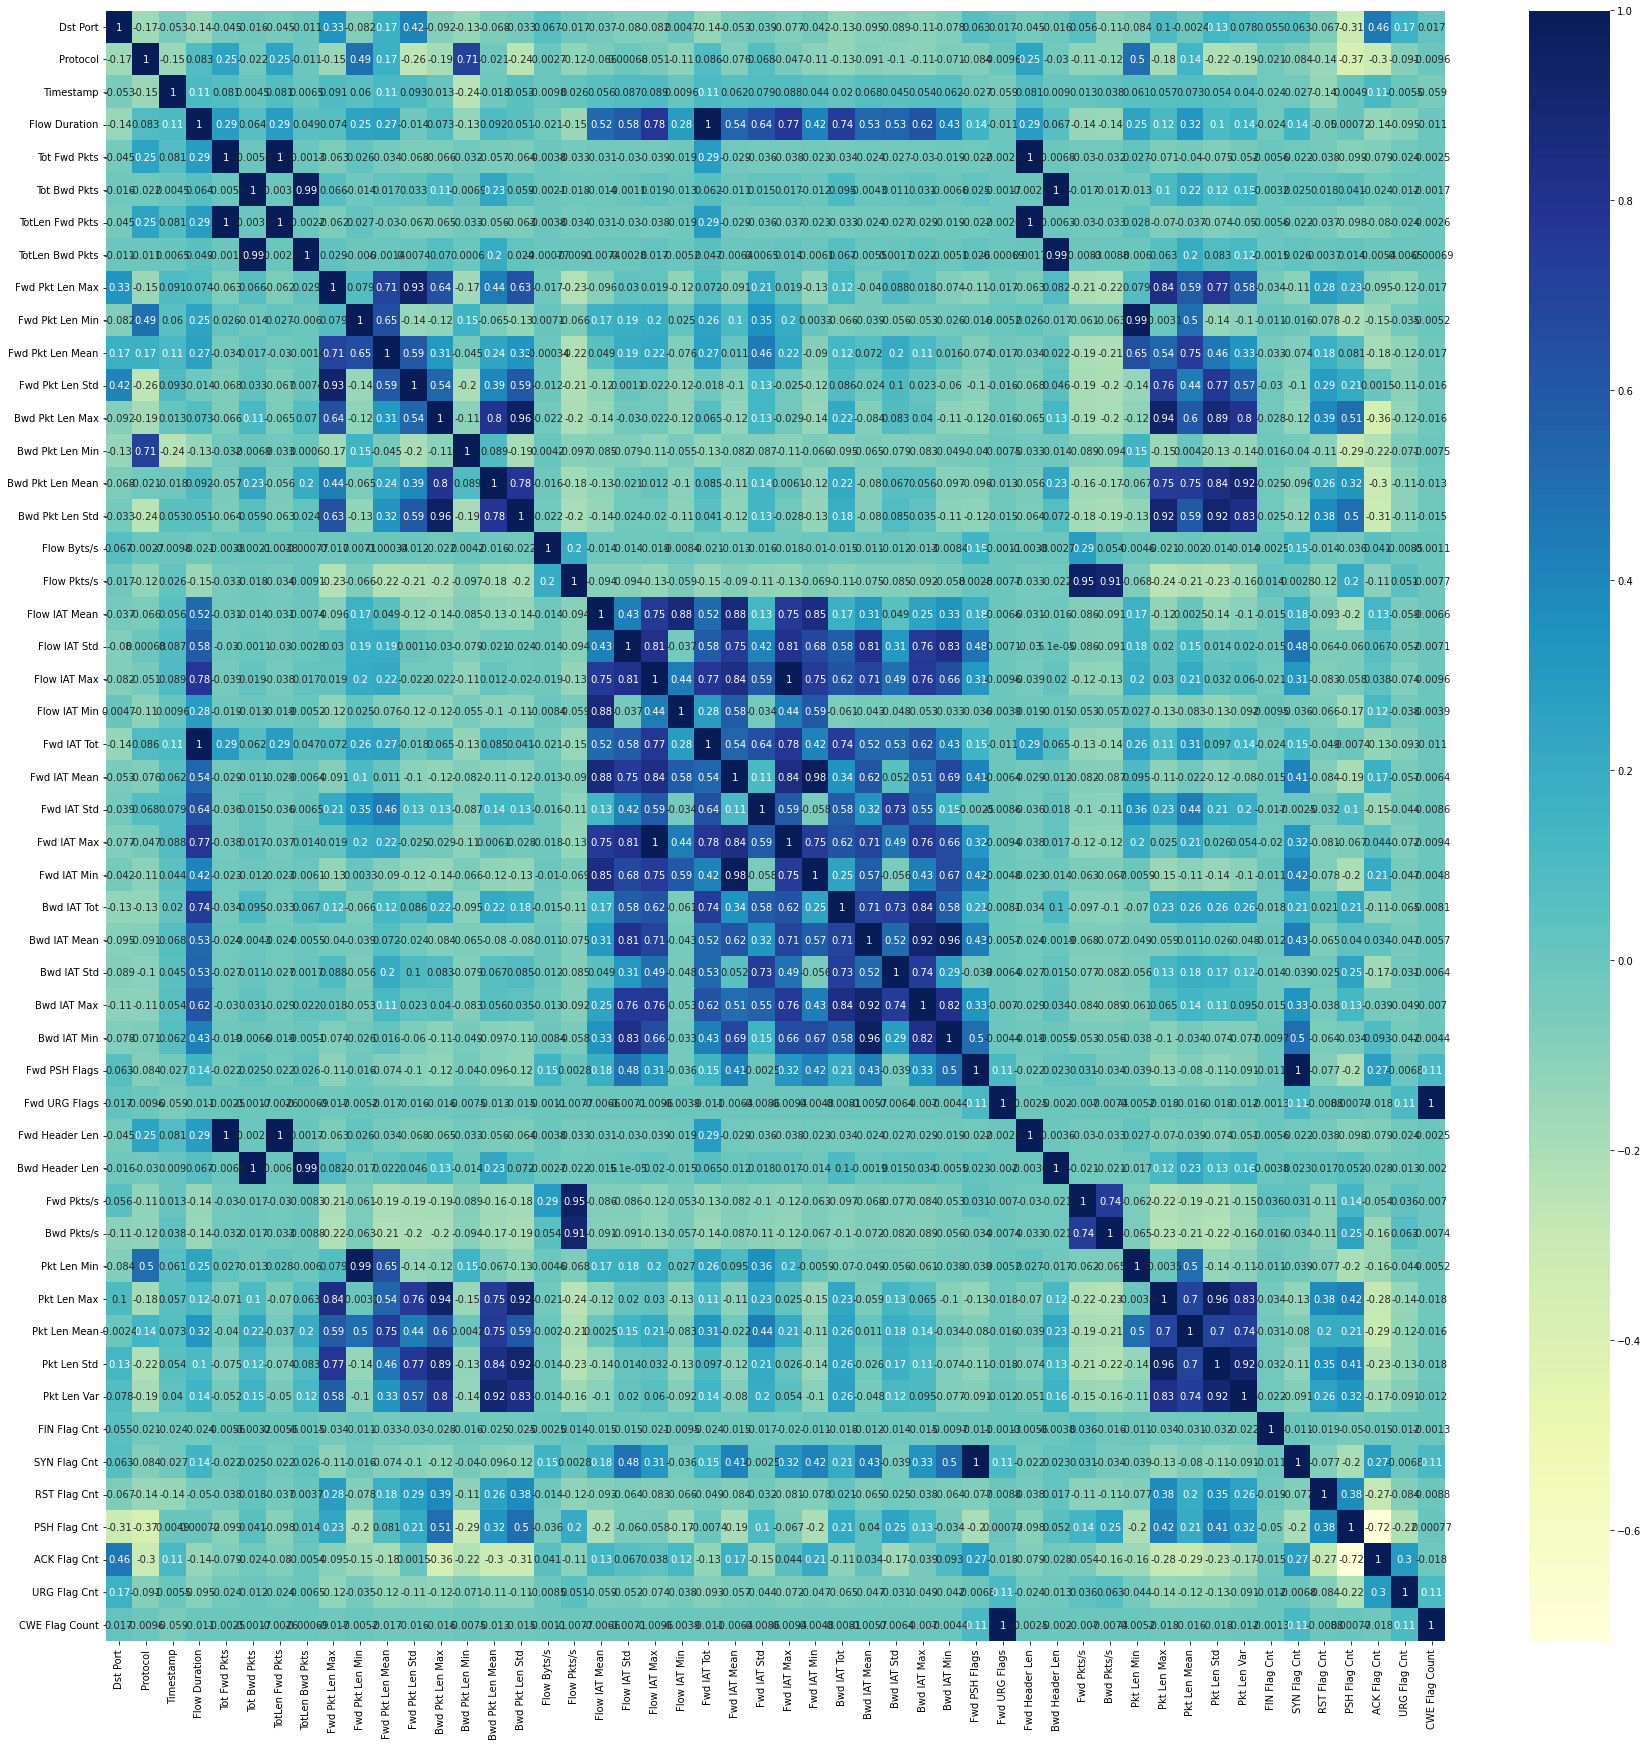

In [ ]:
from matplotlib import pyplot as plt  
import seaborn as sns

#Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
Y_Labels = final_dataset['Label'] 
X_data = final_dataset.drop(['Label'],axis=1)

#Create the correlation heatmap between the features
fig= plt.figure(figsize=(30,30))
sns.heatmap(X_data.corr(), annot=True,cmap="YlGnBu")

In [ ]:
#Findout the features with the correlation value greater than the threshold
def get_correlation_high(X_data,threshold): 
    corr_col=set()
    corrmat=X_data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col
    
#spot the highly co realted features in the dataset 
corelated_features=get_correlation_high(X_data,0.95) 
corelated_features
corr=list(corelated_features)
for i in corr: #dropping the highly corelated features from the dataset 
  final_dataset.drop(labels=[i],axis=1,inplace=True)

In [ ]:
final_dataset

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Bwd Pkts/s,Pkt Len Max,Pkt Len Mean,Pkt Len Var,FIN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,Label
615306,443.0,6.0,1.518602e+18,62418539.0,23.0,30.0,550.0,0.0,90.130435,140.094547,...,0.480626,1430.0,180.592593,101807.830887,0.0,0.0,1.0,0.0,0.0,Benign
631532,53.0,17.0,1.518601e+18,12906.0,1.0,1.0,31.0,31.0,31.000000,0.000000,...,77.483341,79.0,47.000000,768.000000,0.0,0.0,0.0,0.0,0.0,Benign
857904,50137.0,6.0,1.518612e+18,127.0,2.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,Benign
904995,50812.0,6.0,1.518611e+18,106.0,2.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,Benign
468668,80.0,6.0,1.518574e+18,115307134.0,16.0,14.0,293.0,0.0,19.000000,73.068005,...,0.121415,484.0,25.419355,10002.851613,0.0,0.0,1.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,8080.0,6.0,1.517661e+18,497.0,2.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,Bot
78650,8080.0,6.0,1.517625e+18,10530.0,3.0,4.0,326.0,0.0,108.666667,188.216188,...,379.867047,326.0,56.875000,13318.696430,0.0,1.0,1.0,0.0,0.0,Bot
83831,8080.0,6.0,1.517629e+18,495.0,2.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,Bot
342334,8080.0,6.0,1.517624e+18,11656.0,3.0,4.0,326.0,0.0,108.666667,188.216188,...,343.170899,326.0,56.875000,13318.696430,0.0,1.0,1.0,0.0,0.0,Bot


# Models

In [ ]:
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score ,classification_report ,precision_score ,recall_score , f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

#Install last version of xgboost
! pip install xgboost==1.6.0
#Replacing labels with numerical values 
final_dataset.replace(to_replace=['Benign','DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-Slowloris','DoS attacks-SlowHTTPTest','SSH-Bruteforce','FTP-BruteForce','DDOS attack-HOIC','DDOS attack-LOIC-UDP','Infilteration','Bot','Web-attack'],value=[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
#Splitting the Xi and Yi to apply the Permutation Importance model and identify the importanat features to further apply model
Y_cleaned = final_dataset['Label'] 
X_cleaned= final_dataset.drop(['Label'],axis=1)
#making the 80-20 split 
X_train, X_test, Y_train, Y_test = train_test_split(X_cleaned, Y_cleaned, test_size=0.2)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 193.7 MB 37 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


##**Decision tree**

In [ ]:
#k-fold cross validation
from sklearn.tree import DecisionTreeClassifier

#Initializing a decision tree with the default mode (without hyper-parameters)
DT_clf = DecisionTreeClassifier(random_state=0)
# Create an instance of KFold which can be used to get indices of different training and test folds
k_fold = KFold(n_splits=10,shuffle=True,random_state=None)
kfold = k_fold.split(X_train, Y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    DT_clf.fit(X_train.iloc[train, :], Y_train.iloc[train])
    score = DT_clf.score(X_train.iloc[test, :], Y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))


Fold:  1, Training/Test Split Distribution: [51426  7184  7126  6773  4272  6675  5474  4310  1269  7228  7230   689], Accuracy: 0.988
Fold:  2, Training/Test Split Distribution: [51369  7203  7095  6729  4279  6687  5532  4353  1291  7256  7178   684], Accuracy: 0.985
Fold:  3, Training/Test Split Distribution: [51515  7205  7130  6746  4251  6719  5527  4297  1269  7187  7127   683], Accuracy: 0.986
Fold:  4, Training/Test Split Distribution: [51413  7237  7148  6732  4237  6630  5498  4296  1259  7260  7262   684], Accuracy: 0.986
Fold:  5, Training/Test Split Distribution: [51418  7224  7126  6747  4287  6677  5483  4280  1282  7270  7178   684], Accuracy: 0.986
Fold:  6, Training/Test Split Distribution: [51404  7266  7119  6742  4250  6698  5502  4299  1265  7225  7208   678], Accuracy: 0.983
Fold:  7, Training/Test Split Distribution: [51550  7241  7094  6704  4290  6688  5465  4306  1253  7243  7143   679], Accuracy: 0.987
Fold:  8, Training/Test Split Distribution: [51438  719

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Initializing a decision tree with the default mode (without hyper-parameters)
DT_clf = DecisionTreeClassifier(random_state=0)
#Training the model on the 80% of the data 
DT_clf.fit(X_train, Y_train)
#Testing the model with the 20% left data (test data)
DT_pred=DT_clf.predict(X_test)

In [ ]:
print('the Confusion matrix')
print(confusion_matrix(Y_test,DT_pred))

the Confusion matrix
[[13908     0     0     2     0     0     0     0     0   170     1    18]
 [    1  1975     0     0     0     0     0     0     0     0     0     0]
 [    0     0  2063     0     0     0     0     0     0     0     0     0]
 [    2     0     0  1884     0     0     0     0     0     0     0     0]
 [    0     0     0     0  1231     0     0     0     0     0     0     0]
 [    0     0     0     0     0  1877     0     0     0     0     0     0]
 [    0     0     0     0     0     0  1628     0     0     0     0     0]
 [    0     0     0     0     0     0     0  1248     0     0     0     0]
 [    0     0     0     0     0     0     0     0   320     0     0     0]
 [  180     0     0     0     0     0     0     0     0  1777     0     0]
 [    3     0     0     0     0     0     0     0     0     0  2000     0]
 [   19     0     0     0     0     0     0     0     0     0     0   153]]


In [ ]:
00       hgprint('the Precision \n',precision_score(Y_test,DT_pred, average=None))

the Precision 
 [0.98547439 1.         1.         0.99893955 1.         1.
 1.         1.         1.         0.91268618 0.99950025 0.89473684]


In [ ]:
print('the Recall \n',recall_score(Y_test,DT_pred,average=None))

the Recall 
 [0.98645294 0.99949393 1.         0.99893955 1.         1.
 1.         1.         1.         0.90802248 0.99850225 0.88953488]


In [ ]:
print('the f1_score \n',f1_score(Y_test,DT_pred, average=None))

the f1_score 
 [0.98596342 0.9997469  1.         0.99893955 1.         1.
 1.         1.         1.         0.91034836 0.999001   0.89212828]


In [ ]:
print('the accuracy : ',accuracy_score(Y_test,DT_pred))


the accuracy :  0.9869993434011819


In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT

#Initializing a decision tree with max_depth & min_samples_split hyper-parameters
parameters = {'max_depth':[10,30,50,100],'min_samples_split':[5,10,50,100]}

#Finding which value of the hyperparameters gives the best result
DTclf= GridSearchCV(DT(),parameters)
DTclf.fit(X_train, Y_train)

print('Best score: ',DTclf.best_score_)
print('Parameters with best score: ',DTclf.best_params_)

Best score:  0.988693047530681
Parameters with best score:  {'max_depth': 30, 'min_samples_split': 50}


##Random forest 

In [ ]:
#k-FOLD cross validation
from sklearn.ensemble import RandomForestClassifier


#Initializing a Random Forest with the default mode (without hyper-parameters)
RF_clf = RandomForestClassifier()

k_fold = KFold(n_splits=10,shuffle=True,random_state=None)
kfold = k_fold.split(X_train, Y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    RF_clf.fit(X_train.iloc[train, :], Y_train.iloc[train])
    score = RF_clf.score(X_train.iloc[test, :], Y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [51475  7200  7162  6707  4272  6677  5488  4287  1271  7192  7244   681], Accuracy: 0.984
Fold:  2, Training/Test Split Distribution: [51479  7191  7133  6765  4258  6664  5492  4326  1266  7216  7185   681], Accuracy: 0.986
Fold:  3, Training/Test Split Distribution: [51357  7230  7117  6746  4323  6700  5476  4335  1274  7241  7182   675], Accuracy: 0.983
Fold:  4, Training/Test Split Distribution: [51408  7165  7160  6781  4215  6716  5466  4293  1254  7291  7213   694], Accuracy: 0.984
Fold:  5, Training/Test Split Distribution: [51409  7252  7116  6698  4249  6699  5476  4320  1273  7254  7234   676], Accuracy: 0.985
Fold:  6, Training/Test Split Distribution: [51527  7191  7123  6771  4260  6668  5497  4299  1271  7204  7163   682], Accuracy: 0.985
Fold:  7, Training/Test Split Distribution: [51500  7233  7116  6702  4266  6701  5443  4313  1284  7215  7194   689], Accuracy: 0.985
Fold:  8, Training/Test Split Distribution: [51456  725

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Initializing a Random Forest classifier with  the default mode and Training the model on the 80% of the data 
RF_model = RandomForestClassifier(random_state=0).fit(X_train, Y_train)
#Testing the model with the 20% left data (test data)
RF_pred=RF_model.predict(X_test)


In [ ]:
print('the Confusion matrix')
print(confusion_matrix(Y_test,RF_pred))

the Confusion matrix
[[13882     0     1     0     0     0     0     0     0   200     0    16]
 [    1  1975     0     0     0     0     0     0     0     0     0     0]
 [    1     0  2062     0     0     0     0     0     0     0     0     0]
 [    1     0     0  1885     0     0     0     0     0     0     0     0]
 [    0     0     0     0  1231     0     0     0     0     0     0     0]
 [    0     0     0     0     0  1877     0     0     0     0     0     0]
 [    0     0     0     0     0     0  1628     0     0     0     0     0]
 [    0     0     0     0     0     0     0  1248     0     0     0     0]
 [    0     0     0     0     0     0     0     0   320     0     0     0]
 [  205     0     0     0     0     0     0     0     0  1752     0     0]
 [    1     0     0     0     0     0     0     0     0     0  2002     0]
 [   28     0     0     0     0     0     0     0     0     0     0   144]]


In [ ]:
print('the Precision \n',precision_score(Y_test,RF_pred, average=None))

the Precision 
 [0.98321411 1.         0.99951527 1.         1.         1.
 1.         1.         1.         0.89754098 1.         0.9       ]


In [ ]:
print('the Recall \n',recall_score(Y_test,RF_pred,average=None))

the Recall 
 [0.98460884 0.99949393 0.99951527 0.99946978 1.         1.
 1.         1.         1.         0.89524783 0.99950075 0.8372093 ]


In [ ]:
print('the f1_score \n',f1_score(Y_test,RF_pred, average=None))

the f1_score 
 [0.98391098 0.9997469  0.99951527 0.99973482 1.         1.
 1.         1.         1.         0.89639294 0.99975031 0.86746988]


In [ ]:
print('the accuracy : ',accuracy_score(Y_test,RF_pred))


the accuracy :  0.9850952068286277


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF

#Initializing the Random Forest decision trees with max_depth & min_samples_split hyper-parameters
parameters = {'max_depth':[10,20,50,100],'min_samples_split':[10,15,20,30]}
#Finding which value of the hyperparameters gives the best result
RFclf= GridSearchCV(RF(),parameters)
RFclf.fit(X_train, Y_train)
print('Best score: ',RFclf.best_score_)
print('Parameters with best score: ',RFclf.best_params_)

Best score:  0.9850705843729483
Parameters with best score:  {'max_depth': 100, 'min_samples_split': 15}


##XGBoost

In [ ]:
#k-fold cross validation
from xgboost import XGBClassifier

#Initializing a XGB Classifier  with the default mode
XGB_clf = XGBClassifier()

k_fold = KFold(n_splits=10,shuffle=True,random_state=None)
kfold = k_fold.split(X_train, Y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    XGB_clf.fit(X_train.iloc[train, :], Y_train.iloc[train])
    score = XGB_clf.score(X_train.iloc[test, :], Y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [51150  7218  7144  6799  4262  6751  5692  4324  1234  7169  7266   675], Accuracy: 0.991
Fold:  2, Training/Test Split Distribution: [51141  7204  7149  6889  4275  6758  5630  4322  1235  7188  7212   681], Accuracy: 0.992
Fold:  3, Training/Test Split Distribution: [51242  7271  7132  6802  4221  6744  5625  4293  1230  7195  7247   683], Accuracy: 0.990
Fold:  4, Training/Test Split Distribution: [51264  7227  7180  6777  4290  6741  5639  4323  1217  7132  7214   681], Accuracy: 0.992
Fold:  5, Training/Test Split Distribution: [51141  7232  7146  6798  4292  6725  5703  4326  1242  7184  7208   688], Accuracy: 0.994
Fold:  6, Training/Test Split Distribution: [51223  7226  7124  6830  4278  6716  5650  4319  1225  7202  7217   675], Accuracy: 0.992
Fold:  7, Training/Test Split Distribution: [51241  7233  7128  6839  4269  6720  5638  4310  1225  7207  7202   673], Accuracy: 0.992
Fold:  8, Training/Test Split Distribution: [51192  716

In [ ]:
from xgboost import XGBClassifier

#Initializing a XGB Classifier  with the default mode
XGB = XGBClassifier()
#Training the model on the 80% of the data 
XGB.fit(X_train,Y_train)
#Testing the model with the 20% left data (test data)
XGB_preds = XGB.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score ,classification_report ,precision_score ,recall_score , f1_score
print('the Confusion matrix')
print(confusion_matrix(Y_test,XGB_preds))

the Confusion matrix
[[14137     1     0     0     0     0     0     0     0   218     0    13]
 [    0  1986     0     0     0     0     0     0     0     0     0     0]
 [    0     0  2050     0     0     0     0     0     0     0     0     0]
 [    0     0     0  1805     0     0     0     0     0     0     0     0]
 [    0     0     0     0  1205     0     0     0     0     0     0     0]
 [    0     0     0     0     0  1809     0     0     0     0     0     0]
 [    0     0     0     0     0     0  1501     0     0     0     0     0]
 [    0     0     0     0     0     0     0  1237     0     0     0     0]
 [    0     0     0     0     0     0     0     0   359     0     0     0]
 [   29     0     0     0     0     0     0     0     0  1981     0     0]
 [    1     0     0     0     0     0     0     0     0     0  1965     0]
 [   11     0     0     0     0     0     0     0     0     0     0   161]]


In [ ]:
print('the Precision \n',precision_score(Y_test,XGB_preds, average=None))

the Precision 
 [0.9971082  0.99949673 1.         1.         1.         1.
 1.         1.         1.         0.90086403 1.         0.92528736]


In [ ]:
print('the Recall \n',recall_score(Y_test,XGB_preds,average=None))

the Recall 
 [0.98385413 1.         1.         1.         1.         1.
 1.         1.         1.         0.98557214 0.99949135 0.93604651]


In [ ]:
print('the f1_score \n',f1_score(Y_test,XGB_preds, average=None))

the f1_score 
 [0.99043682 0.9997483  1.         1.         1.         1.
 1.         1.         1.         0.94131623 0.99974561 0.93063584]


In [ ]:
print('the accuracy : ',accuracy_score(Y_test,XGB_preds))


the accuracy :  0.9910400735173455


In [ ]:
from xgboost import XGBClassifier
#Initializing a XGB Classifier  with the default mode
XGB = XGBClassifier(booster='gbtree',objective='multi:softprob',eta=0.1,max_depth=50)
#Training the model on the 80% of the data 
XGB.fit(X_train,Y_train)
#Testing the model with the 20% left data (test data)
XGB_preds = XGB.predict(X_test)

print("Accuracy",accuracy_score(Y_test,XGB_preds))
print('the f1_score \n',f1_score(Y_test,XGB_preds, average=None))

Accuracy 0.9906134103515049
the f1_score 
 [0.98997757 0.99849095 1.         1.         1.         1.
 1.         1.         1.         0.94112083 0.99898167 0.91988131]


In [ ]:
XGB.save_model('XGB_classifier.json')

##Support-vector machine

In [ ]:
#k-fold cross validation
from sklearn import svm


#Initializing a SVM Classifier with the RBF kernel and train the model 
SVM_clf =  svm.SVC(kernel='rbf')

k_fold = KFold(n_splits=10,shuffle=True,random_state=None)
kfold = k_fold.split(X_train, Y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    SVM_clf.fit(X_train.iloc[train, :], Y_train.iloc[train])
    score = SVM_clf.score(X_train.iloc[test, :], Y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))


In [ ]:
from sklearn import svm
 
#Initializing a SVM Classifier with the RBF kernel and train the model 
rbf = svm.SVC(kernel='rbf').fit(X_train, Y_train)
#Initializing a SVM Classifier with the POLY kernel and train the model
poly = svm.SVC(kernel='poly').fit(X_train, Y_train)
#testing the model with the 20% left data 
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

print("POLY Accuracy",accuracy_score(Y_test,poly_pred))
print("RBF Accuracy",accuracy_score(Y_test,rbf_pred))


POLY Accuracy 0.8570256073539068
RBF Accuracy 0.9146749835850295


##The K-Nearest Neighbors (KNN)

In [ ]:
#k-fold cross validation
from sklearn.neighbors import KNeighborsClassifier

#Initializing a K Nearest Neighbors Classifier with the default mode
KNN_clf = KNeighborsClassifier(n_neighbors=9)

k_fold = KFold(n_splits=10,shuffle=True,random_state=None)
kfold = k_fold.split(X_train, Y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    KNN_clf.fit(X_train.iloc[train, :], Y_train.iloc[train])
    score = KNN_clf.score(X_train.iloc[test, :], Y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [51386  7179  7207  6720  4303  6689  5474  4387  1271  7187  7257   650], Accuracy: 0.836
Fold:  2, Training/Test Split Distribution: [51305  7211  7197  6757  4302  6712  5468  4376  1260  7159  7300   663], Accuracy: 0.835
Fold:  3, Training/Test Split Distribution: [51340  7189  7206  6775  4312  6697  5472  4402  1247  7160  7216   694], Accuracy: 0.838
Fold:  4, Training/Test Split Distribution: [51357  7179  7209  6765  4339  6722  5460  4368  1270  7184  7186   671], Accuracy: 0.835
Fold:  5, Training/Test Split Distribution: [51401  7150  7237  6744  4330  6651  5453  4385  1259  7205  7213   682], Accuracy: 0.841
Fold:  6, Training/Test Split Distribution: [51361  7168  7225  6734  4322  6680  5534  4374  1258  7171  7199   684], Accuracy: 0.841
Fold:  7, Training/Test Split Distribution: [51459  7149  7216  6713  4352  6663  5498  4384  1256  7144  7202   674], Accuracy: 0.841
Fold:  8, Training/Test Split Distribution: [51464  719

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


#Initializing a K Nearest Neighbors Classifier with the default mode
knn_model = KNeighborsClassifier(n_neighbors=15)
#Training the model on the 80% of the data 
knn_model.fit(X_train, Y_train)
#Testing the model with the 20% left data (test data)
KNN_pred = knn_model.predict(X_test)

print('the accuracy',accuracy_score(Y_test,KNN_pred))

the accuracy 0.8387202625102543


In [ ]:

#Initializing a K Nearest Neighbors Classifier with 10 possibilitys for k 
k=1
while k < 10 :
  knn_model = KNeighborsClassifier(n_neighbors=k)
  #Training the model on the 80% of the data 
  knn_model.fit(X_train, Y_train)
  #Testing the model with the 20% left data (test data)
  KNN_pred = knn_model.predict(X_test)
  print('with k = ',k,'the accuracy',accuracy_score(Y_test,KNN_pred))
  k+=1

with k =  1 the accuracy 0.808137817883511
with k =  2 the accuracy 0.7781460213289582
with k =  3 the accuracy 0.8199179655455291
with k =  4 the accuracy 0.8138146021328958
with k =  5 the accuracy 0.8282854799015587
with k =  6 the accuracy 0.823363412633306
with k =  7 the accuracy 0.8320918785890073
with k =  8 the accuracy 0.8315340442986054
with k =  9 the accuracy 0.8357342083675143


##Multi-layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
#fitting and transform the data for the model
scaler = StandardScaler()
X_Cleaed = scaler.fit_transform(X_cleaned)

X_train, X_test, Y_train, Y_test= train_test_split(X_Cleaed,Y_cleaned, test_size = 0.2, random_state = 21)
#Initializing the MLPClassifier
MLP_classifier = MLPClassifier()
#Fitting the training data to the network
MLP_classifier.fit(X_train, Y_train)
#Predicting y for X_test
MLP_pred = MLP_classifier.predict(X_test)

In [ ]:
print('the Confusion matrix')
print(confusion_matrix(Y_test, MLP_pred))

the Confusion matrix
[[13172    26     0     1     2     0     0     1     0   937     2     0]
 [    0  2062     0     0     0     0     0     0     0     0     0     0]
 [    1     0  1986     0     0     0     0     0     0     0     0     0]
 [    0     0     0  1833     0     0     0     0     0     0     0     0]
 [    0     0     0     0  1219     0     0     0     0     0     0     0]
 [    0     0     0     0     0  1845     0     0     0     0     0     0]
 [    0     0     0     0     0     0  1539     0     0     0     0     0]
 [    0     0     0     0     0     0     0  1175     0     0     0     0]
 [    0     0     0     0     0     0     0     0   354     0     0     0]
 [  665     0     0     0     0     0     0     0     0  1371     0     0]
 [    3     0     0     0     0     0     0     0     0     0  2084     0]
 [   94     0     0     0     0     0     0     0     0     0     0    88]]


In [ ]:
print('the Precision \n',precision_score(Y_test, MLP_pred, average=None))

the Precision 
 [0.94524578 0.98754789 1.         0.99945474 0.998362   1.
 1.         0.99914966 1.         0.5940208  0.99904123 1.        ]


In [ ]:
print('the Recall \n',recall_score(Y_test, MLP_pred,average=None))

the Recall 
 [0.93147585 1.         0.99949673 1.         1.         1.
 1.         1.         1.         0.67337917 0.99856253 0.48351648]


In [ ]:
print('the f1_score \n',f1_score(Y_test, MLP_pred, average=None))

the f1_score 
 [0.9383103  0.99373494 0.9997483  0.9997273  0.99918033 1.
 1.         0.99957465 1.         0.63121547 0.99880182 0.65185185]


In [ ]:
print('the accuracy : ',accuracy_score(Y_test, MLP_pred))

the accuracy :  0.9446522309711286


In [ ]:
MLP_classifier = MLPClassifier(hidden_layer_sizes=(200,100,50,10), max_iter=300,solver='sgd',random_state=1)

#Fitting the training data to the network
MLP_classifier.fit(X_train, Y_train)
#Predicting y for X_val
MLP_pred = MLP_classifier.predict(X_test)

In [ ]:
print('the Confusion matrix')
print(confusion_matrix(Y_test, MLP_pred))

the Confusion matrix
[[12878     1     0     4     2     1     1     0     0  1250     0     0]
 [   18  2062     0     0     0     0     0     0     0     0     0     0]
 [    1     0  1997     0     0     0     0     0     0     0     0     0]
 [    1     0     0  1876     0     0     0     0     0     0     0     0]
 [    0     0     0     0  1177     0     0     0     0     0     0     0]
 [    1     0     0     0     0  1846     0     0     0     0     0     0]
 [    0     0     0     0     0     0  1552     0     0     0     0     0]
 [    0     0     0     0     0     0     0  1221     0     0     0     0]
 [    0     0     0     0     0     0     0     0   342     0     0     0]
 [  438     0     0     0     0     0     0     0     0  1585     0     0]
 [    0     0     0     0     0     0     0     0     0     0  2015     0]
 [   96     0     0     0     0     0     0     0     0     0     0   101]]


In [ ]:
print('the Precision \n',precision_score(Y_test, MLP_pred, average=None))

the Precision 
 [0.95868384 0.99951527 1.         0.99787234 0.99830365 0.99945858
 0.99935608 1.         1.         0.55908289 1.         1.        ]


In [ ]:
print('the Recall \n',recall_score(Y_test, MLP_pred,average=None))

the Recall 
 [0.91094292 0.99134615 0.9994995  0.99946723 1.         0.99945858
 1.         1.         1.         0.78348987 1.         0.51269036]


In [ ]:
print('the f1_score \n',f1_score(Y_test, MLP_pred, average=None))

the f1_score 
 [0.93420384 0.99541395 0.99974969 0.99866915 0.9991511  0.99945858
 0.99967794 1.         1.         0.65253191 1.         0.67785235]


In [ ]:
print('the accuracy : ',accuracy_score(Y_test, MLP_pred))

the accuracy :  0.94045821571588


In [ ]:
import joblib

joblib.dump(MLP_classifier, 'MLP_classifier.pkl')

['MLP_classifier.pkl']

# Testing 


In [ ]:
import pandas as pd 
data_frame3 = pd.read_csv('/content/ids-intrusion-csv/02-16-2018.csv')
data_frame3[data_frame3["Label"] != "Benign"]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
97,21,6,16/02/2018 10:12:14,21,1,1,0,0,0,0,...,40,0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
98,21,6,16/02/2018 10:12:14,3,1,1,0,0,0,0,...,40,0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
99,21,6,16/02/2018 10:12:14,3,1,1,0,0,0,0,...,40,0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
100,21,6,16/02/2018 10:12:14,3,1,1,0,0,0,0,...,40,0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
101,21,6,16/02/2018 10:12:14,2,1,1,0,0,0,0,...,40,0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,21,6,16/02/2018 10:36:33,3,1,1,0,0,0,0,...,40,0,0.0,0,0,0,0.0,0,0,DoS attacks-SlowHTTPTest
1048571,21,6,16/02/2018 10:36:33,3,1,1,0,0,0,0,...,40,0,0.0,0,0,0,0.0,0,0,DoS attacks-SlowHTTPTest
1048572,21,6,16/02/2018 10:36:33,3,1,1,0,0,0,0,...,40,0,0.0,0,0,0,0.0,0,0,DoS attacks-SlowHTTPTest
1048573,21,6,16/02/2018 10:36:33,5,1,1,0,0,0,0,...,40,0,0.0,0,0,0,0.0,0,0,DoS attacks-SlowHTTPTest


AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ADA = AdaBoostClassifier(DecisionTreeClassifier(random_state=0))
ADA.fit(X_train_XGB,Y_train)
ADA_preds = ADA.predict(X_test_XGB)

print("Accuracy",accuracy_score(Y_test,ADA_preds))
print(classification_report(Y_test,XGB_preds))

In [ ]:
#k-fold cross validation
from xgboost import XGBClassifier

#Initializing a XGB Classifier  with the default mode
XGB_clf = XGBClassifier()

k_fold = KFold(n_splits=10,shuffle=True,random_state=None)
kfold = k_fold.split(X_train, Y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    XGB_clf.fit(X_train.iloc[train, :], Y_train.iloc[train])
    score = XGB_clf.score(X_train.iloc[test, :], Y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [51371  7233  7157  6738  4265  6698  5533  4341  1213  7257  7200   668], Accuracy: 0.991
Fold:  2, Training/Test Split Distribution: [51382  7175  7201  6761  4262  6683  5529  4364  1217  7233  7222   646], Accuracy: 0.992
Fold:  3, Training/Test Split Distribution: [51240  7238  7188  6782  4306  6702  5544  4357  1206  7252  7208   652], Accuracy: 0.992
Fold:  4, Training/Test Split Distribution: [51349  7218  7192  6731  4288  6623  5572  4379  1219  7239  7206   659], Accuracy: 0.992
Fold:  5, Training/Test Split Distribution: [51352  7273  7132  6739  4238  6690  5564  4329  1215  7279  7227   637], Accuracy: 0.992
Fold:  6, Training/Test Split Distribution: [51385  7204  7145  6752  4249  6644  5532  4399  1203  7313  7224   625], Accuracy: 0.992
Fold:  7, Training/Test Split Distribution: [51282  7206  7178  6747  4329  6712  5552  4357  1210  7223  7215   664], Accuracy: 0.992
Fold:  8, Training/Test Split Distribution: [51304  723

In [ ]:
XGB_clf.save_model('XGB_classifier.json')

In [ ]:
columns = ['TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Bwd Pkt Len Std', 'Fwd IAT Tot',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Min', 'Bwd PSH Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Std', 'SYN Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
       'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',
       'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min']

final_dataset.drop(columns, inplace=True, axis=1)
final_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Var',
       'FIN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'Label'],
      dtype='object')

n_estimators=100,learning_rate=0.1

In [ ]:
final_dataset['Label'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
data_for_test = final_dataset
Benign = final_dataset.loc[final_dataset['Label'] == 	"Benign"]
Infilteration = final_dataset.loc[final_dataset['Label'] == "Infilteration"]
DoS_attacks_GoldenEye = final_dataset.loc[final_dataset['Label'] == "DoS attacks-GoldenEye"]
Bot = final_dataset.loc[final_dataset['Label'] == "Bot"]
DoS_attacks_Hulk = final_dataset.loc[final_dataset['Label'] == "DoS attacks-Hulk"]
DoS_attacks_Slowloris = final_dataset.loc[final_dataset['Label'] == "DoS attacks-Slowloris"]
SSH_Bruteforce = final_dataset.loc[final_dataset['Label'] == "SSH-Bruteforce"]
FTP_BruteForce = final_dataset.loc[final_dataset['Label'] == "FTP-BruteForce"]
DDOS_attack_HOIC = final_dataset.loc[final_dataset['Label'] == "DDOS attack-HOIC"]
DoS_attacks_SlowHTTPTest = final_dataset.loc[final_dataset['Label'] == "DoS attacks-SlowHTTPTest"]
DDOS_attack_LOIC_UDP = final_dataset.loc[final_dataset['Label'] == "DDOS attack-LOIC-UDP"]
Web_attack = final_dataset.loc[final_dataset['Label'] == "Web-attack"]

In [ ]:
data_for_test['Label'].value_counts()

In [ ]:
Benign['Label'].value_counts()
Infilteration['Label'].value_counts()
DoS_attacks_GoldenEye['Label'].value_counts()
Bot['Label'].value_counts()
DoS_attacks_Hulk['Label'].value_counts()
DoS_attacks_Slowloris['Label'].value_counts()
SSH_Bruteforce['Label'].value_counts()
FTP_BruteForce['Label'].value_counts()
DDOS_attack_HOIC['Label'].value_counts()
DoS_attacks_SlowHTTPTest['Label'].value_counts()
DDOS_attack_LOIC_UDP['Label'].value_counts()
Web_attack['Label'].value_counts()

In [ ]:
Benign=	Benign.head(10000)

In [ ]:
data_for_test = [
    Benign, 
    Infilteration,
    DoS_attacks_GoldenEye,
    Bot, 
    DoS_attacks_Hulk,
    DoS_attacks_Slowloris,
    SSH_Bruteforce,
    FTP_BruteForce,
    DDOS_attack_HOIC,
    DoS_attacks_SlowHTTPTest,
    Web_attack
]
data_for_test=pd.concat(data_for_test) #concatenate the Stratified samples

In [ ]:

data_for_test['Label'].value_counts()

In [ ]:
columns = ['TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Bwd Pkt Len Std', 'Fwd IAT Tot',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Min', 'Bwd PSH Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Std', 'SYN Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
       'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',
       'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min']

final_dataset.drop(columns, inplace=True, axis=1)
#data_for_test

In [ ]:
final_dataset = data_for_test
final_dataset["Label"].value_counts()

In [ ]:
print(final_dataset.dtypes)

In [ ]:
columns = ['TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Bwd Pkt Len Std', 'Fwd IAT Tot',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Min', 'Bwd PSH Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Std', 'SYN Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
       'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',
       'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min']

#data_frame5.drop(columns, inplace=True, axis=1)
#Encoding all types of web attacks by the label web-attack
#data_frame5.replace(to_replace=['Brute Force -Web','Brute Force -XSS','SQL Injection'],value='Web-attack',inplace=True)
def Cleaning_data(df:object):
    #Converting the feature datatypes
    df['Timestamp'] = pd.to_datetime(df['Timestamp']).values.astype(np.int64)#converting the time stamps to int
    columns=df.columns
    df=df.drop_duplicates(keep="first") #Dropping the duplicates
    df=df.replace([np.inf, -np.inf], np.nan) #Replacing the infinite values to NaN
    df.replace(r'^\s*$', np.nan, regex=True)#converting the blank spaces into NaN values
    df=df.replace(np.nan, 0) #Converting the NaN values to zeros
    for i in columns: #changing all the numerical features to float datatype
    	if i != 'Label':
           df[i]=df[i].astype(float)

    return df
data_frame5 = Cleaning_data(data_frame5
                            )
Y_cleaned = data_frame5['Label']
X_cleaned= data_frame5.drop(['Label'],axis=1)

Encoder = LabelEncoder() 

lc = Encoder.fit(Y_cleaned) 

lc_y = lc.transform(Y_cleaned)

scaler = StandardScaler()
X_train_XGB = scaler.fit_transform(X_cleaned)


XGB_preds = XGB.predict(X_train_XGB)

print("Accuracy",accuracy_score(lc_y ,XGB_preds))
print(classification_report(lc_y ,XGB_preds))


In [ ]:
import pandas as pd 
data_frame3 = pd.read_csv('/content/ids-intrusion-csv/02-16-2018.csv')
data_frame3[data_frame3["Label"] != "Benign"]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
97,21,6,16/02/2018 10:12:14,21,1,1,0,0,0,0,...,40,0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
98,21,6,16/02/2018 10:12:14,3,1,1,0,0,0,0,...,40,0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
99,21,6,16/02/2018 10:12:14,3,1,1,0,0,0,0,...,40,0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
100,21,6,16/02/2018 10:12:14,3,1,1,0,0,0,0,...,40,0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
101,21,6,16/02/2018 10:12:14,2,1,1,0,0,0,0,...,40,0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,21,6,16/02/2018 10:36:33,3,1,1,0,0,0,0,...,40,0,0.0,0,0,0,0.0,0,0,DoS attacks-SlowHTTPTest
1048571,21,6,16/02/2018 10:36:33,3,1,1,0,0,0,0,...,40,0,0.0,0,0,0,0.0,0,0,DoS attacks-SlowHTTPTest
1048572,21,6,16/02/2018 10:36:33,3,1,1,0,0,0,0,...,40,0,0.0,0,0,0,0.0,0,0,DoS attacks-SlowHTTPTest
1048573,21,6,16/02/2018 10:36:33,5,1,1,0,0,0,0,...,40,0,0.0,0,0,0,0.0,0,0,DoS attacks-SlowHTTPTest
